In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from google.colab.patches import cv2_imshow 
import math
import pandas as pd

In [108]:
listTechic = list()
listSSI = list()
listMSE = list()
listPSNR = list()
listAbsoluteErroMSE = list()
listAbsoluteErroSSI = list()

In [132]:
def metricsCalculator(imgA,imgB):
    shapeImageACols,shapeImageALine, channelsA = imgA.shape
    shapeImageBCols,shapeImageBLine, channelsB = imgB.shape

    if (shapeImageACols,shapeImageALine) != (shapeImageBCols,shapeImageBLine):
        imgA = cv2.resize(imgA, (shapeImageBLine,shapeImageBCols), interpolation = cv2.INTER_AREA)
        shapeImageACols,shapeImageALine, channelsA = imgA.shape


    imgAfloat = img_as_float(imgA)
    imgBfloat = img_as_float(imgB)

    ssim_imgs = ssim(imgAfloat, imgBfloat, data_range=imgAfloat.max() - imgBfloat.min(),channel_axis=channelsA-1)
    mse_imgs = mse(imgAfloat, imgBfloat)
    psnr_imgs = psnr(imgAfloat,imgBfloat)
    return (ssim_imgs, mse_imgs, psnr_imgs)

In [110]:
def meanMetrics(imgA, imgB):

    a1,b1,c1 = metricsCalculator(imgA, imgB)
    a2,b2,c2 = metricsCalculator(imgB, imgA)
    # 1 0
    return ((a1+a2)/2,(b1+b2)/2,(c1+c2)/2)



In [111]:
def erroAbsolute(valueReal, valueObtido):
    return (abs(valueReal - valueObtido) )

In [112]:
def analiseImgs(imgA, imgB):

    global listSSI
    global listMSE
    global listPSNR
    global listAbsoluteErroMSE
    global listAbsoluteErroSSI

    ssiResul,mseResul, psnrResul = meanMetrics(imgA, imgB)

    listSSI.append(ssiResul)
    listMSE.append(mseResul)
    listPSNR.append(psnrResul)


    listAbsoluteErroMSE.append(erroAbsolute(0,mseResul))
    listAbsoluteErroSSI.append(erroAbsolute(1,ssiResul))
    

In [138]:
def tableCreate():
    global listTechic
    global listSSI
    global listMSE
    global listPSNR
    global listAbsoluteErroMSE
    global listAbsoluteErroSSI
    
    d = {'TechicName': listTechic, "MSE": listMSE, 'SSI': listSSI,"SSI Abs Error": listAbsoluteErroSSI , "PSNR": listPSNR}
    df = pd.DataFrame(data=d)

    return df

In [139]:
global listTechic

imgOrige = cv2.imread("media/nib.png")
imgSuperResolution = cv2.imread("media/nibOut.png")
# 0.00010588759760251305 0.9909427183039428
listTechic.append(f"nib TcA")
analiseImgs(imgOrige, imgSuperResolution)

table = tableCreate()

# print(table)


# metricsCalculator(imgOrige, imgOrige)
# metricsCalculator(imgSuperResolution, imgSuperResolution)

15
7
7
7
7
7


ValueError: All arrays must be of the same length

In [37]:
imgOrige = cv2.imread("media/nib.png")
img = img_as_float(imgOrige)
rows, cols = img.shape
print(rows, cols)

505 504


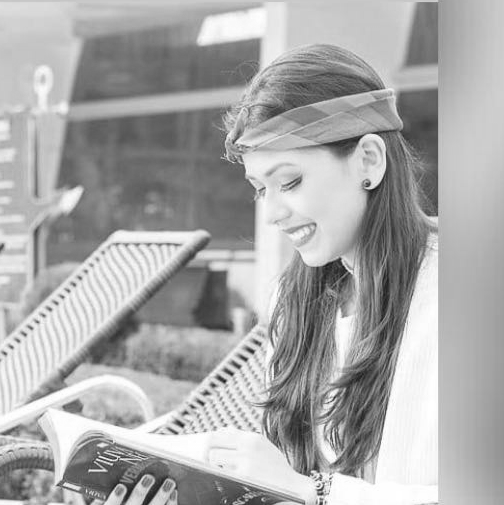

In [31]:
cv2_imshow(imgOrige)

In [38]:
ssim_none = ssim(img, img, data_range=img.max() - img.min())
mse_none = mean_squared_error(img, img)
print(mse_none, ssim_none)

0.0 1.0


In [39]:
imgSuperResolution = cv2.imread("media/nibOut.png",0)
imgSuperResolution = cv2.resize(imgSuperResolution, (cols,rows), interpolation = cv2.INTER_AREA)
imgSup = img_as_float(imgSuperResolution)
rowsSp, colsSp = imgSup.shape
print(rowsSp, colsSp)

505 504


In [40]:
ssim_none = ssim(img, imgSup, data_range=img.max() - imgSup.min())
mse_none = mean_squared_error(img, imgSup)
print(mse_none, ssim_none)

0.00010588759760251305 0.9909427183039428


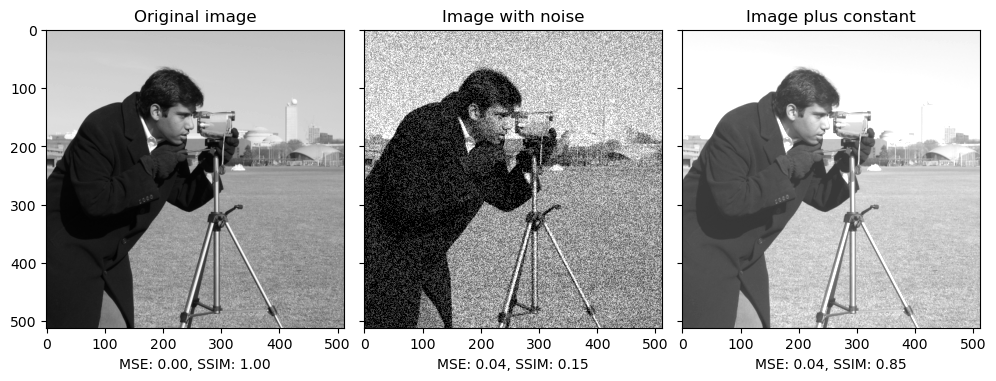

In [2]:
noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mean_squared_error(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()

